## **Problem Definition:**
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV



import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copy data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Display last 5 rows
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights**
- The data has 5,960 rows and 13 columns

### **Check the data types of the columns**

In [7]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**
- BAD, LOAN, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, and DEBTINC are numeric values/data, while REASON and JOB are of the object data type.

- All values in the data are non-null.

### **Check for missing values**

In [8]:
# Analyze missing values 
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
# Check the percentage of missing values in the each column.
data.isnull().sum() * 100 / len(data)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights**
- We see that the column with the highest percent of missing values is DEBTINC, while the lowest (aside from those columns with no missing values) was VALUE.

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

# Add target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [13]:
# Change the data type of object type column to category
for i in cols:
    data[i] = data[i].astype('category')

In [14]:
# Check the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [15]:
# Analyze the summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights**

- The mean/average loan amount was 18,607.97, while the minimum loan amount issued was 1,100.00 and the max issued was 89,900.00.
- The DEBTINC mean was at around 33.78, with a minimum of .5245 and a max of 203.31. These numbers are important to consider as a company should be concerned with an applicant's debit to income ratio prior to giving out a loan as this could be a good indicator of whether the applicant is likely to default or not.
- With regard to derogatory reports, the minimum is 0 and the max is 10. We also see that between the 25th and 75th percentiles, there were 0 derogatory reports, which indicates that most applicants have been compliant with their past loans and credit concerns 
- Review of the CLAGE observes a minimum age of 0, which is not necessarily a bad thing as this may indicate a borrower is new and possibly obtaining their first loan. 
- As we observe the 25th percentile, the credit line was 115 months, or 9.5 years that a credit line has been open. The number of months that a credit line has been open appears to increase from the 50th to 75th percentiles, indicating that applicants have had credit lines for a long time. 
- Having a credit line open for a long period of time can be seen as a positive factor as it means that applicants are being responsible enough to hold their credit lines open without forced closure.


In [16]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
data.describe(include = ['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights**
- There are 2 unique values in BAD (0 to indicate loan repaid and 1 to indicate default on loan) and REASON (whether the loan is used for home improvement or debt consolidation). 
- There are 6 unique values for JOB. The frequency column shows how many applications (out of the total count column) fell into that category (ie: 4771/5960 fell into the 0 category for BAD, meaning that 4771 applications repaid their loan).

**Let's look at the unique values in all the categorical variables**

In [17]:
# Check the count of unique values in each categorical column
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(1))
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


**Insights**
- For the BAD column, around 80% of the values are 0 and 20% of the values are 1, indicating a relatively balanced class distribution. 
- For the REASON column, around 69% of the values are 'DebtCon' and 31% of the values are 'HomeImp', indicating a slight imbalance in the distribution of values for this column. 
- For the JOB column, 'Other' is the most frequent value, appearing in around 42% of the values. 
- Other values like 'ProfExe', 'Office', 'Mgr', 'Self' and 'Sales' are less frequent, appearing in around 22%, 17%, 14%, 3% and 2% of the values respectively.

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

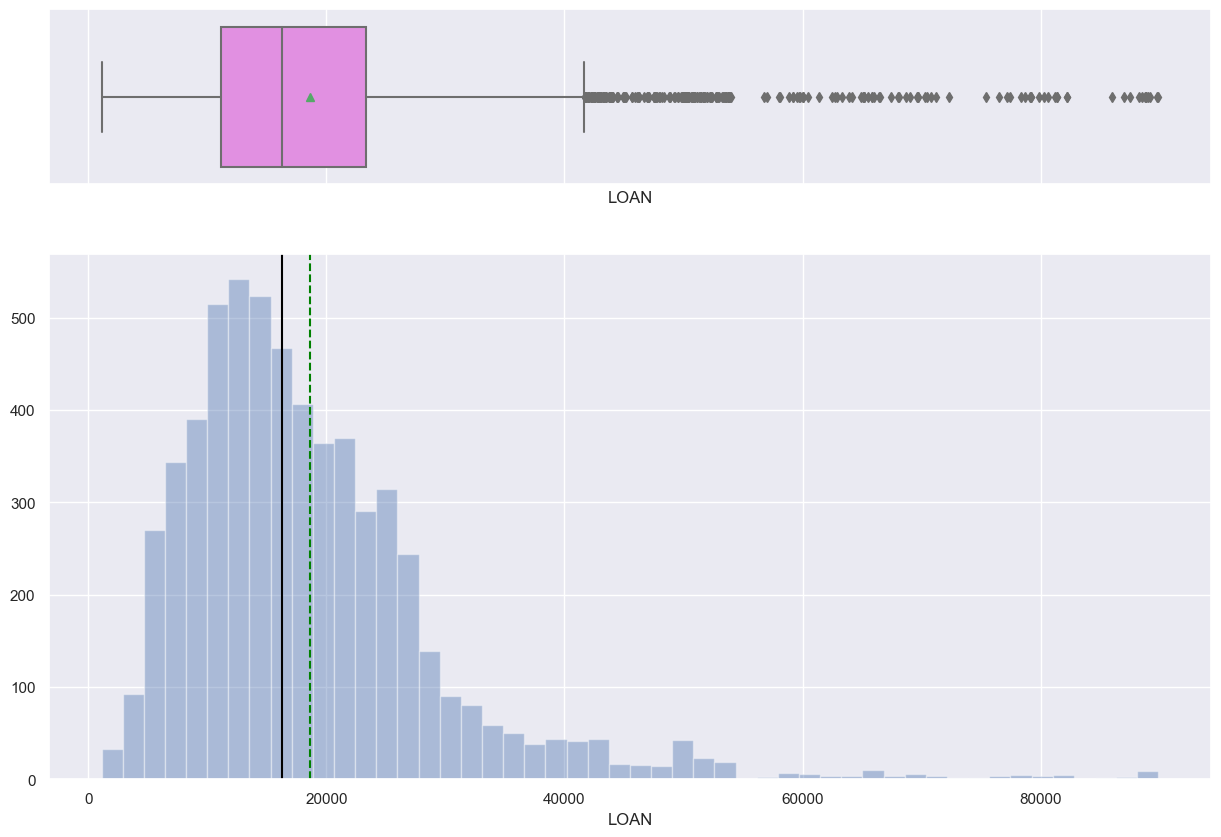

In [19]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights**
- A majority of applicants had a loan value between 10,000 and 18,000. 
- Based on the box plot, there appeared to be a significant amount of outliers after the upper percentile and past the box plot's right whisker max value of about 42,000. 
- The histogram shows a decline in applicants as the loan becomes larger (after approximately 14,000 or 16,000 is where the decline appears to occur). 
- On the histogram, the green dotted line represents te mean, which is at about 20,000; while the black line represents the median, which is at around 18,000.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

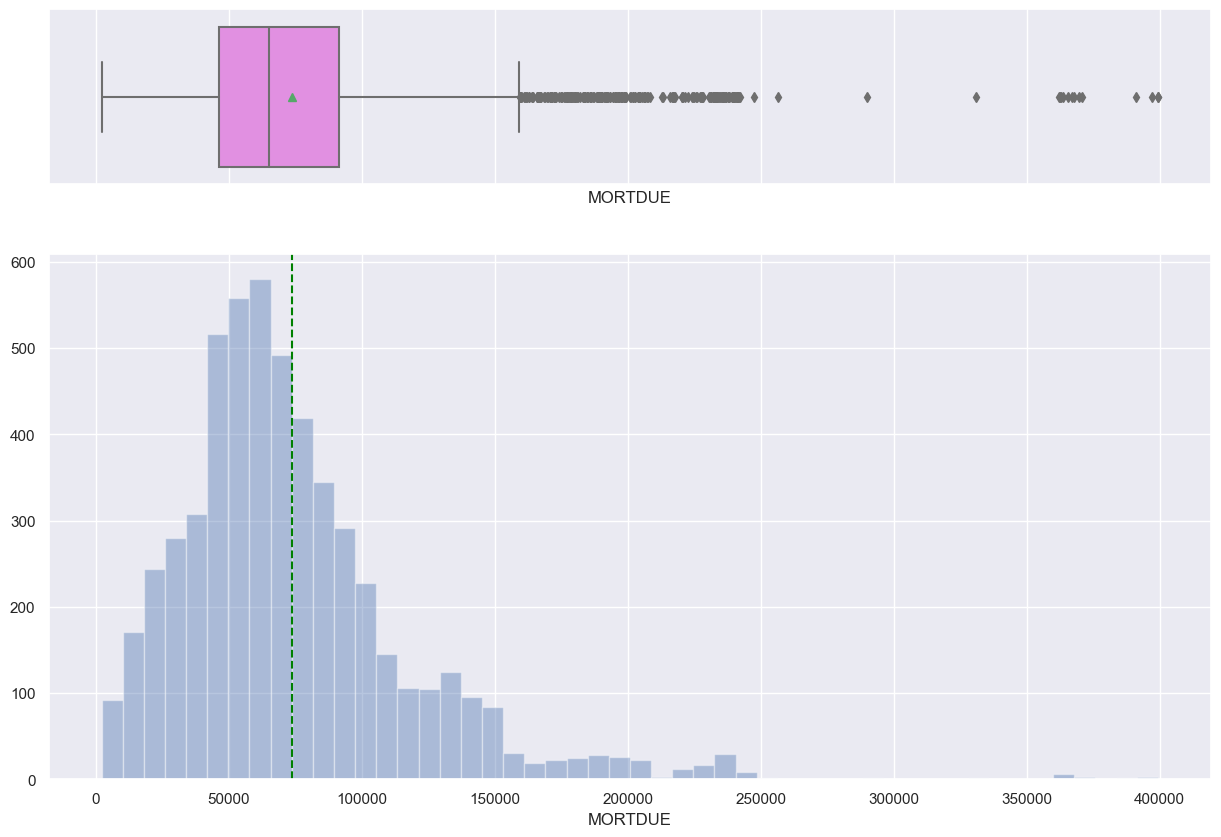

In [21]:
# Build histogram and boxplot for MORTDUE and VALUE variables

histogram_boxplot(data['MORTDUE'])

**Insights**
- The left whisker (min) is at about 1000, while the right whisker (max) is at 155,000 - 160,000; it appears there were several outliers outside the right whisker of the boxplot.
- It appears the average mortgage was at around 55,000 - 60,000.
- The histogram for MORTDUE shows a median value of near 75,000, and there was a steady decline in MORTDUE after about 50,000 to 55,000.
- The histogram is skewed to the right.

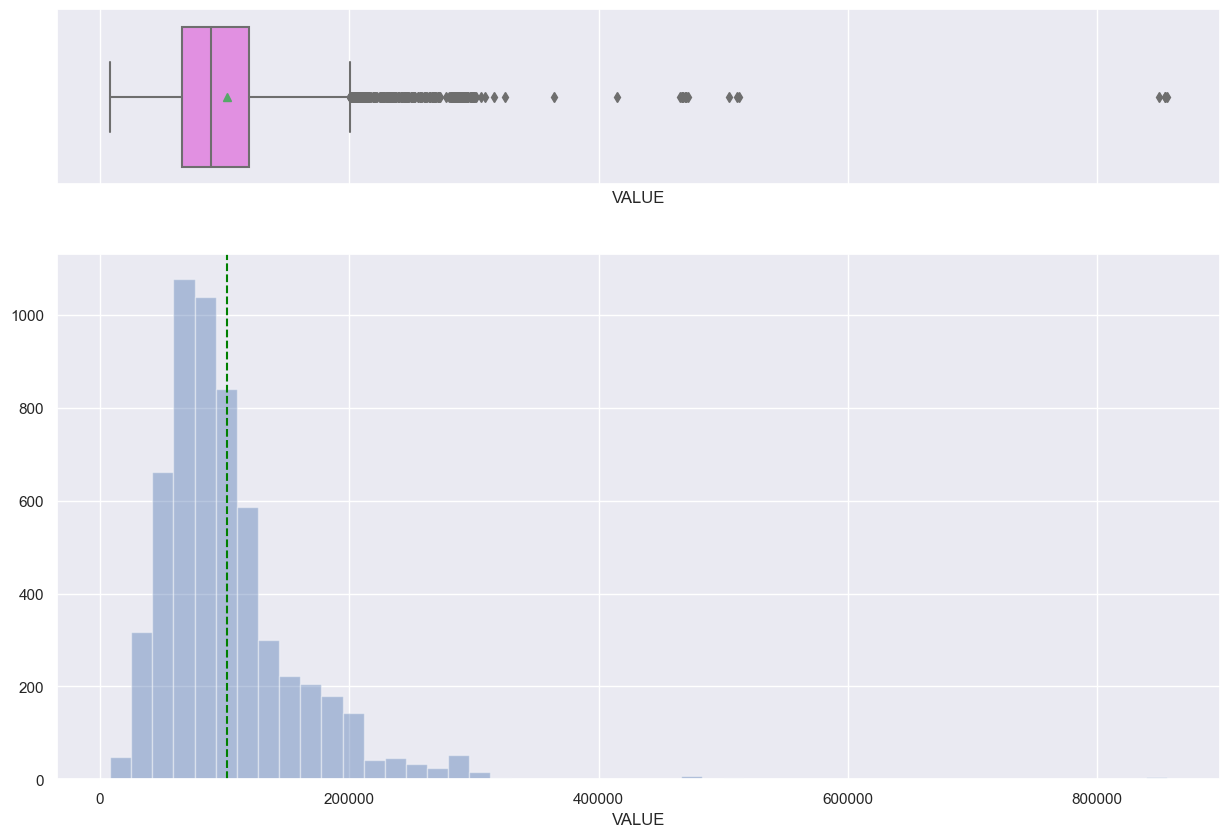

In [22]:
# Build histogram and boxplot for VALUE variable
histogram_boxplot(data['VALUE'])

**Insights**
- The boxplot for VALUE showed a left whisker (min) value of about 2,000, and the right whisker showed a max of about 200,000. - There were also outliers observed above the upper quartile of the boxplot. 
- The histogram for VALUE shows that a majority of properties were valued under 200,000. 
- The property value in which most applicants fell into was around 75,000, while the median was a bit above 100,000. 
- There was a significant decrease in the number of people who owned property where the property's value was greater than 100,000.
- The histogram is skewed to the right.

### **2. Univariate Analysis - Categorical Data**

In [23]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage

    plt.show() # show the plot

#### Analyze Barplot for DELINQ

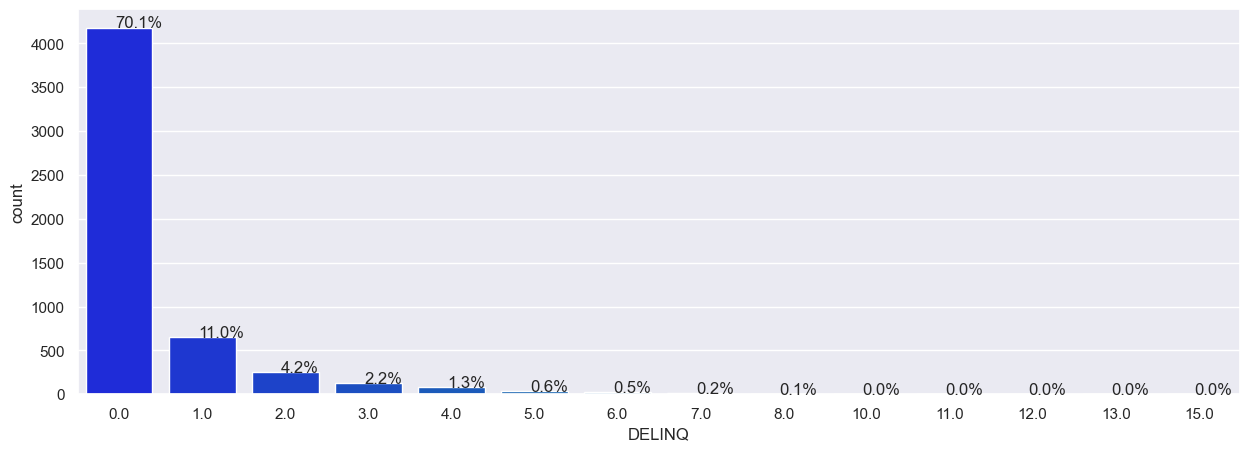

In [24]:
# Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights**
- 70.1% of applicants have 0 delinquent credit lines. 
- The percentage of people with deliquent credit lines were not as significant, and the percentage dropped as the number of delinquent credit lines increased.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

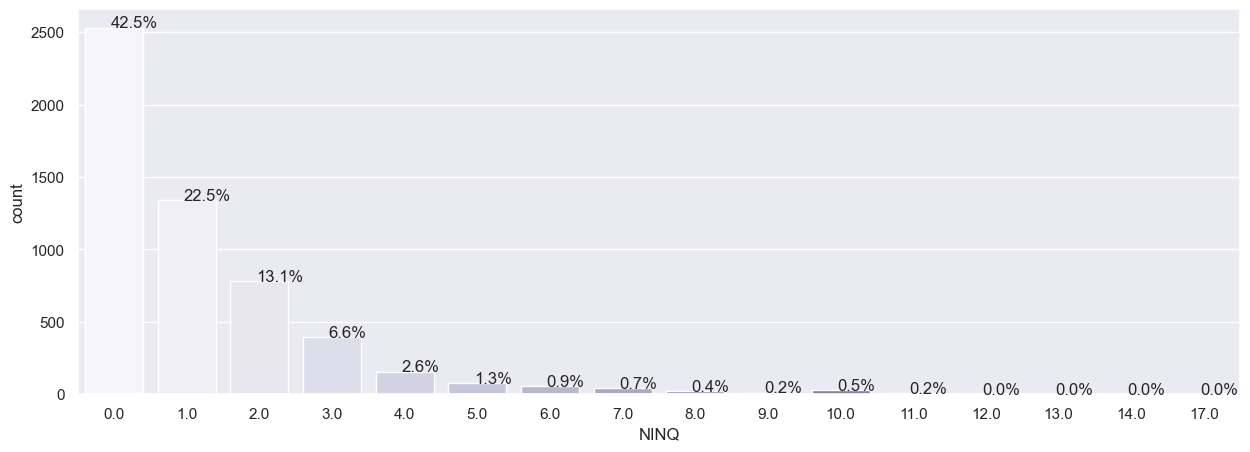

In [25]:
# Build barplot for NINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["NINQ"],palette='Purples')
perc_on_bar(ax,data["NINQ"])

**Insights**
- The barplot for number of recent credit inquiries (NINQ) showed that 42.5% of applicants had 0 recent credit inquiries and 22.5% of applicants had one credit inquiry.
- As the number of recent credit inquiries increased, the percentage of applicants who had recent credit inquiries decreased.

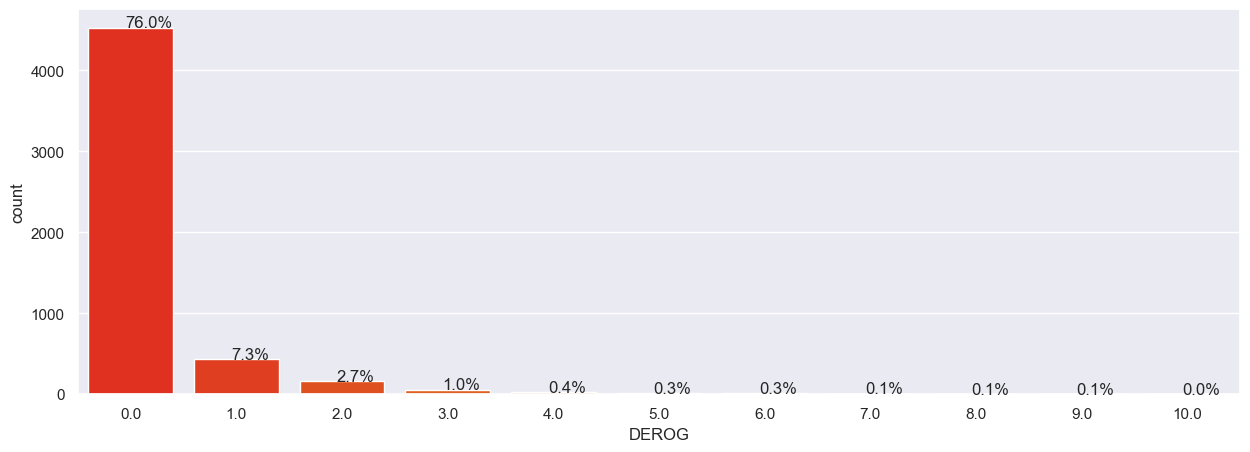

In [26]:
# Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='autumn')
perc_on_bar(ax,data["DEROG"])

**Insights**
- The barplot for derogatory reports (DEROG) showed that 76.0% of applicants had 0 derogatory reports. 7.3% of applicants had 1 derogatory report. 
- As the number of derogatory reports increased, the percentage of borrowers that had derogatory reports decreased.

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

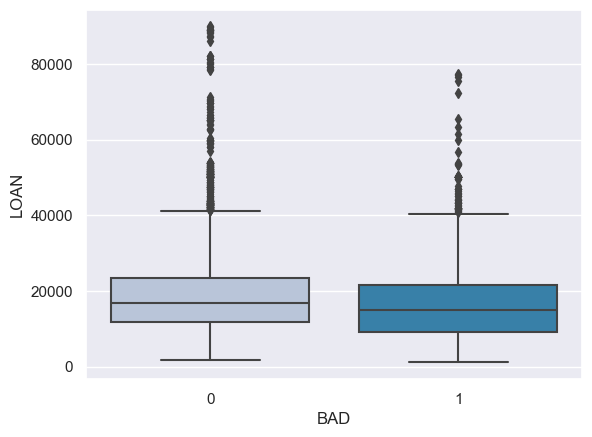

In [27]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights**
- There did not appear to be too much of a difference between applicants who defaulted and applicants who paid off their loan. - Those who paid of their loan borrowed a little bit less than those applicants who defaulted. 

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

<AxesSubplot:xlabel='REASON', ylabel='DEBTINC'>

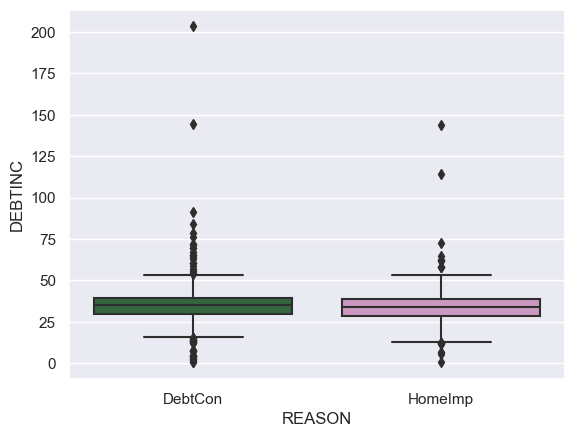

In [28]:
# Plot REASON vs DEBTINC
sns.boxplot(data["REASON"],data['DEBTINC'],palette="cubehelix")

**Insights**
- A Bi-Variate Analysis was conducted between REASON (categorical) and DEBTINC (continuous) to determine if there was a significant difference in the DEBTINC between people who applied for the loan for home improvement reasons or for debt consolidation reasons. 
- The above boxplot shows that there was not much of a difference in the debt to income ratio between applicants who applied for the loan for home improvement purposes versus those who applied for debt consolidation purposes. 
- A closer look does find that applicants who applied for the loan for debt consolidation reasons did have a slightly higher debt to income ratio than those who applied for the loan for home improvement purposes. 
- Outliers were observed for both reasons, with the debt consolidation reason having the highest outlier of above 200 for a debt to income ratio.

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

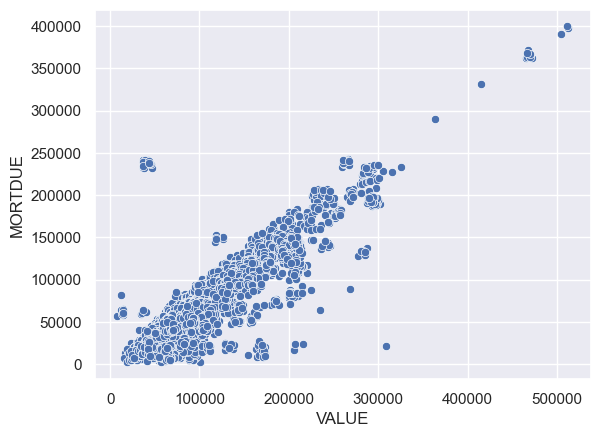

In [29]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights**
- The scatterplot shows that as the value of a property increased, so did the mortgage due. 
- There does appear to be a positive linear relationship between VALUE and MORTDUE. 
- However, a majority of the points in the scatter plot were between the 0 - 250,000 area on the x-axis (VALUE) and between the 0 - 200,000 value on the y-axis (MORTDUE). 

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

<AxesSubplot:xlabel='DEROG', ylabel='DEBTINC'>

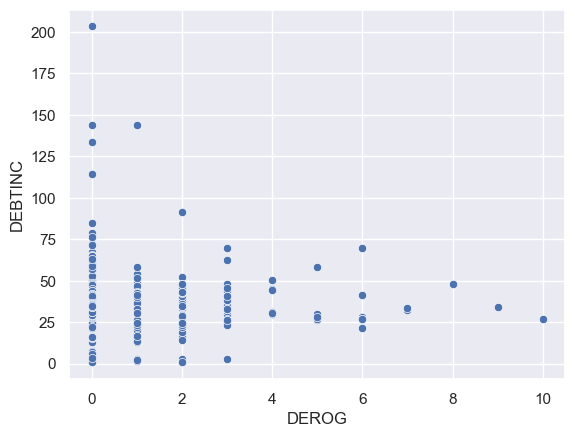

In [30]:
# Plot DEROG vs DEBTINC
sns.scatterplot(data["DEROG"],data['DEBTINC'],palette="red")

**Insights**
- There are several outliers observed in the scatterplot with DEROG vs DEBTINC.
    - Outliers may represent instances where individuals have a high number of derogatory remarks, even with low debt-to-income or vice versa.
- However, a trend line can be drawn across at DEBTINC points 25 and 50, where the trend line has a slope of 0. 
    - This could suggest that the number of derogatory reports are constant or have little variation.
- It appears those with a debt to income ratio of 25 are more likely to have derogatory remarks, with those having a debt to income ratio of 50 trailing behind. 

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [31]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for BAD and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


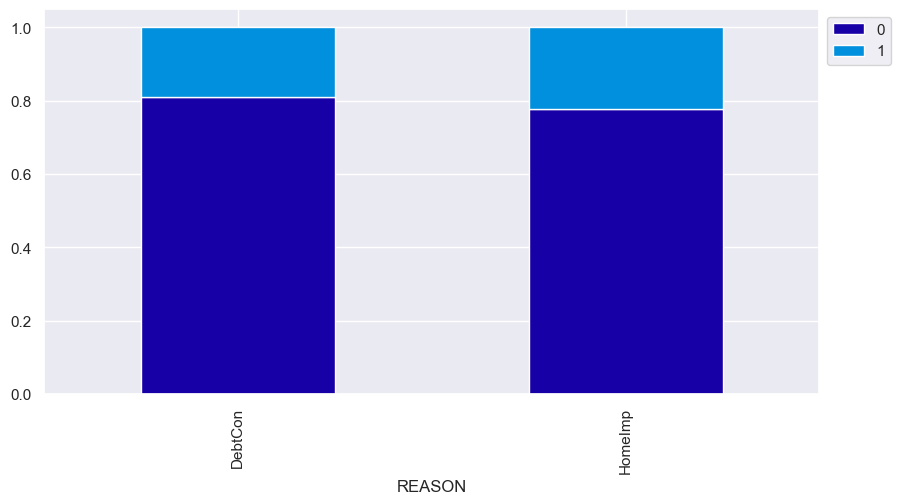

In [32]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights**
- It appears less applicants defaulted when the loan was for debt consolidation versus home improvement. 
- However, the number of those who defaulted on either reason are relatively close.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


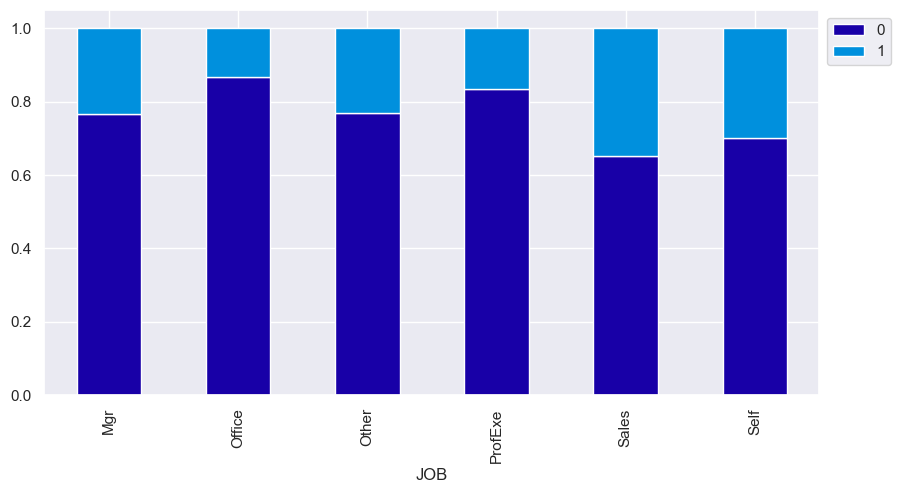

In [33]:
# Plot stacked bar plot for BAD and JOB

stacked_plot(data['JOB'])

**Insights**
- The stacked bar shows that the job category with the lowest default was Office worker, while the second lowest was ProfExe. 
- The job category with the highest number of defaults was Sales, and Self was second.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

<AxesSubplot:>

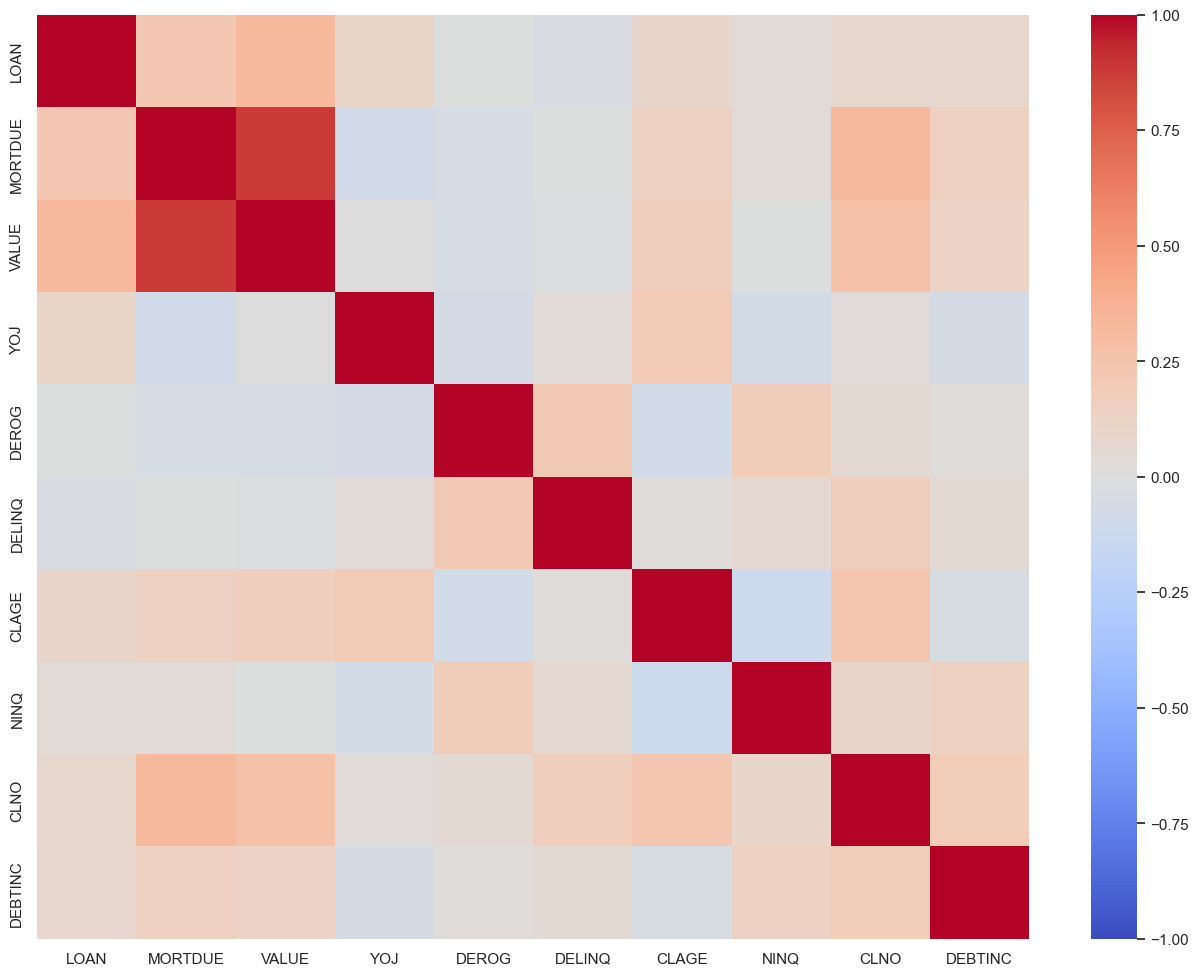

In [34]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
corr = data[numerical_col].corr()

# Plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels= numerical_col,
        yticklabels= numerical_col) 

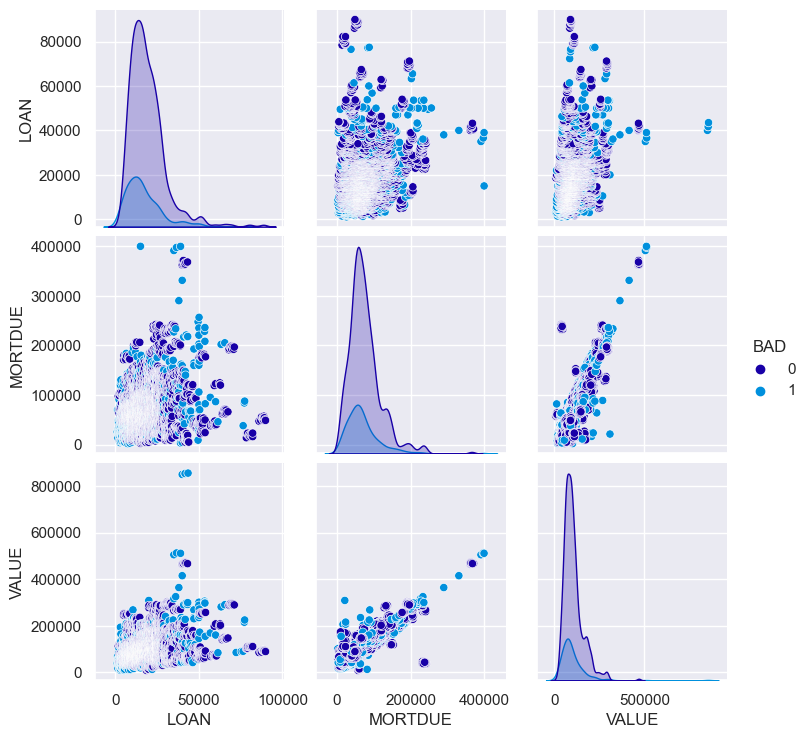

In [35]:
# Build pairplot for the data with hue = 'BAD'
sns.pairplot(data = data, vars = ['LOAN', 'MORTDUE', 'VALUE'], hue = 'BAD')
plt.show()

#### Treating Outliers

In [45]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
  
    Q1=data.quantile(0.25) # 25th quantile
    Q3=data.quantile(0.75)  # 75th quantile
    IQR=0.75 - 0.25   # IQR Range
    Lower_Whisker = min #define lower whisker
    Upper_Whisker = max  # define upper Whisker
   
    # All values samller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whishker will be assigned value of upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)  
    for c in col_list: 
        df = treat_outliers(df,c)    
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
        
    return df


In [46]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values

In [47]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [48]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)


#### Filling missing values in numerical columns with median and mode in categorical variables

In [49]:
# Treat Missing values in numerical columns with median and mode in categorical variables

# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
df[num_data.columns] = df[num_data.columns].fillna(df[num_data.columns].median())

# Fill object columns with model.

for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [50]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df.drop(['BAD'], axis = 1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X)

# Create y(dependent varibale)
y = df['BAD']

### **Splitting the data into 70% train and 30% test set**

In [52]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why.

In [53]:
# Create metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model**

In [54]:
# Define the Logistic regression model
model = LogisticRegression()

# Fitting the model on the training data 
model.fit(X_train, y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      3382
           1       0.60      0.00      0.01       790

    accuracy                           0.81      4172
   macro avg       0.71      0.50      0.45      4172
weighted avg       0.77      0.81      0.73      4172



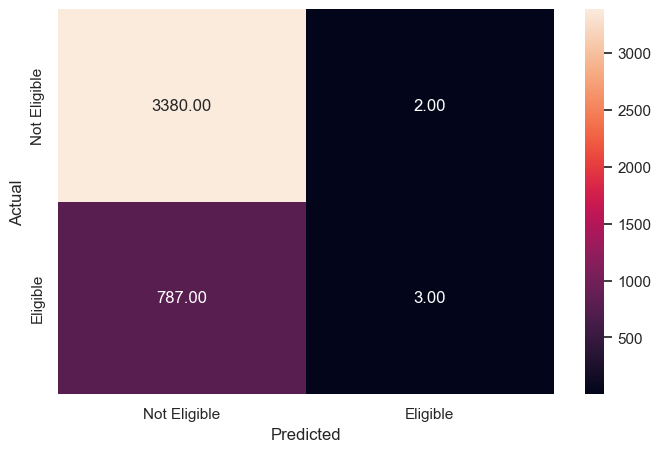

In [55]:
# Predict for train set
train_predictions = model.predict(X_train)

# Check the performance on the train dataset
metrics_score(y_train, train_predictions)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1389
           1       0.50      0.00      0.00       399

    accuracy                           0.78      1788
   macro avg       0.64      0.50      0.44      1788
weighted avg       0.72      0.78      0.68      1788



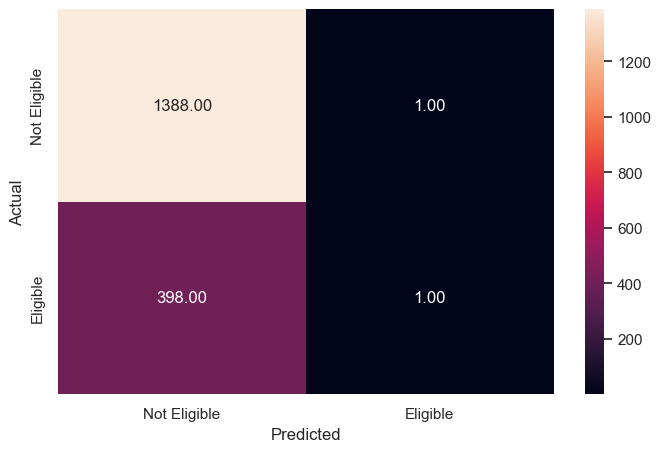

In [56]:
# Predict for test set
test_predictions = model.predict(X_test)

# Check the performance on the test dataset
metrics_score(y_test, test_predictions)

**Observations:**
- It appears that the training dataset and the test dataset shows that the model is overfitting on the training dataset. 
- The accuracy and F1-score for the loan default class is significantly lower on the test dataset compared to the training dataset. 
- The precision, recall, and F1-score for the loan default class is around 0.6 for the training dataset, whereas for the test dataset it is around 0.5. This indicates that the model is not generalizing well to the test data. 
- The model has improved at classifying those who paid off the loan in both the training and test datasets with precision, recall, and F1-score being around 0.8 and 0.9.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [57]:
# Print the coefficients of logistic regression
coeff = pd.DataFrame(X_train.columns)

coeff['Coefficient Estimate'] = pd.Series(model.coef_[0])

print(coeff)

                              0  Coefficient Estimate
0                          LOAN         -1.903731e-05
1                       MORTDUE         -4.341994e-06
2                         VALUE          2.892617e-06
3                           YOJ         -2.908506e-04
4                         DEROG          6.254757e-05
5                        DELINQ          9.195682e-05
6                         CLAGE         -6.293097e-03
7                          NINQ          7.280703e-05
8                          CLNO         -2.519637e-04
9                       DEBTINC         -2.307949e-04
10  MORTDUE_missing_values_flag         -1.187289e-06
11    VALUE_missing_values_flag          8.941839e-06
12   REASON_missing_values_flag         -1.968728e-06
13      JOB_missing_values_flag         -5.010240e-06
14      YOJ_missing_values_flag         -5.199095e-06
15    DEROG_missing_values_flag         -1.025450e-05
16   DELINQ_missing_values_flag         -7.833482e-06
17    CLAGE_missing_values_f

**Insights**
- A positive coefficient indicates that as the value of that independent variable increases, the probability of loan approval increases, whereas a negative coefficient indicates that as the value of that independent variable increases, the probability of loan approval decreases. 
- The important variables (as based on the model) are: 
    - LOAN: A decrease in LOAN is associated with a decrease in the probability of loan approval. 
    - MORTDUE: A decrease in MORTDUE is associated with a decrease in the probability of loan approval. 
    - VALUE: An increase in VALUE is associated with an increase in the probability of loan approval. 
    - YOJ: An increase in YOJ is associated with a decrease in the probability of loan approval. 
    - DEROG: An increase in DEROG is associated with an increase in the probability of loan approval. 
    - DELINQ: An increase in DELINQ is associated with an increase in the probability of loan approval. 
    - CLAGE: An increase in CLAGE is associated with a decrease in the probability of loan approval. 
    - NINQ: An increase in NINQ is associated with an increase in the probability of loan approval. 
    - CLNO: A decrease in CLNO is associated with a decrease in the probability of loan approval. 
    - DEBTINC: A decrease in DEBTINC is associated with a decrease in the probability of loan approval.

- The coefficients estimated in the logistic regression model show the strength and direction of the relationship between the independent variables and the dependent variable, which is loan approval.

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?


**Response:**

Extreme values can still have an impact on the tree structure and the resulting predictions, with tree based models. The exact way of handling outliers would depend on the problem at hand. However, the presence of outliers and the distribution of the data points are less of a concern as compared to Logistic Regression because tree based models do not make assumptions about the distribution of data. Instead, they divide the feature space into regions, and assign a class label to each region based on the majority of the training data points in that region. Therefore, tree-based models are more robust to the presence of outliers, so they are not too much of a concern.

#### Data Preparation for the tree based model

In [58]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)


In [59]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

#### Separating the target variable y and independent variable x

In [60]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix

X = data.drop(["BAD"], axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X)

# Create y(dependent varibale)
y = data["BAD"]

#### Split the data

In [61]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
# Define Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
clf = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

In [63]:
# Fit Decision tree model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

#### Checking the performance on the train dataset

In [64]:
# Check performance on the training data
y_pred = clf.predict(X_train)

print("Accuracy on training data: ",accuracy_score(y_train,y_pred))

Accuracy on training data:  1.0


#### Checking the performance on the test dataset

In [65]:
# Checking performance on the testing data
y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy:  0.8825503355704698
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       954
           1       0.75      0.62      0.68       238

    accuracy                           0.88      1192
   macro avg       0.83      0.78      0.80      1192
weighted avg       0.88      0.88      0.88      1192



**Insights**
- Based on the performance metrics on the training data and test data, it appears that the model is overfitting on the training data. 
- The accuracy on the training data is 100%, while the accuracy on the test data is 0.89, which is lower. 
- The lower accuracy on the test data suggests that the model may not generalize well to unseen data. 
- Additionally, the precision, recall, and f1-score values are also lower on the test data compared to the training data, further indicating overfitting.

### **Think about it:**
- Can we improve this model?
- How to get optimal parameters in order to get the best possible results?


**Response**

- The following can be considered in trying to improve the model and in optimizing parameters for best results: Use Grid Search or Random Search for Hyperparameter tuning. This will help in finding the best combination of parameters that lead to better performance.

    - Try using other algorithms to compare their performance and see if the Decision Tree is the best model for this dataset or not.

    - Try transforming the dataset, (maybe scaling features?)

    - Experiment with different criteria for splitting the nodes, like Gini or entropy (as indicated below).

    - Pruning the tree, which involves removing some of the splits and leaf nodes to reduce overfitting.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {�gini�, �entropy�}**

The function to measure the quality of a split. Supported criteria are �gini� for the Gini impurity and �entropy� for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [67]:
# Choose the type of classifier.
clf2 = DecisionTreeClassifier()


# Grid of parameters to choose from
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5]}


# Type of scoring used to compare parameter combinations
scoring = 'accuracy'


# Run the grid search
grid_obj = GridSearchCV(clf, param_grid, scoring=scoring)


# Fit the GridSearch on train dataset
grid_fit = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
clf2 = grid_fit.best_estimator_


# Fit the best algorithm to the data. 
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=12,
                       min_samples_split=6)

#### Checking the performance on the train dataset

In [68]:
# Check performance on the training data based on the tuned model
train_predictions = grid_fit.predict(X_train)
print("Accuracy on training data: ",accuracy_score(y_train,train_predictions))

Accuracy on training data:  0.9402265100671141


#### Checking the performance on the test dataset

In [69]:
# Check performance on the testing data based on the tuned model
predictions = grid_fit.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Classification Report: ", classification_report(y_test, predictions))

Accuracy:  0.8674496644295302
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.91      0.92       954
           1       0.66      0.70      0.68       238

    accuracy                           0.87      1192
   macro avg       0.79      0.81      0.80      1192
weighted avg       0.87      0.87      0.87      1192



**Insights**
- The accuracy on the training data is 0.954 which is relatively high, however the accuracy on the test data is 0.87 which is lower compared to the training data. 
- This could indicate overfitting on the training data, which means that the model would have difficulty generalizing new, unseen data.

#### Plotting the Decision Tree

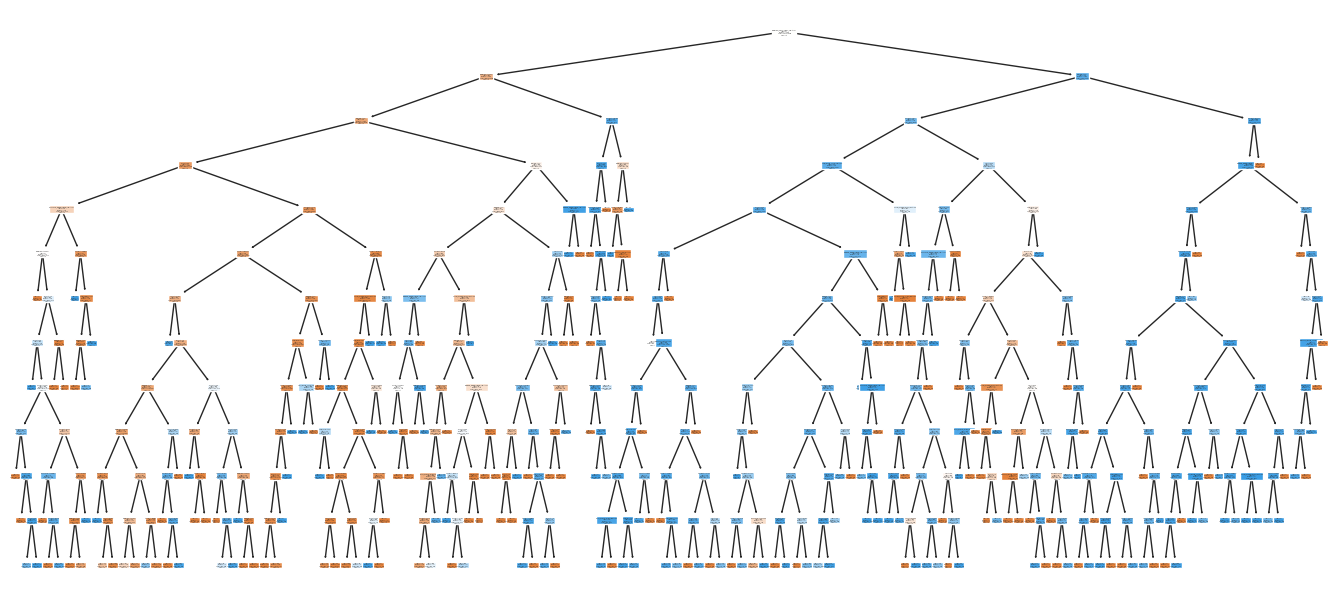

In [72]:
# Plot the decision  tree and analyze it to build the decision rule
plt.figure(figsize=(17,7.5))
tree.plot_tree(clf2, filled=True, class_names=['0', '1'], feature_names=X_train.columns)
plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down:

Business rules could not be deduced due to the size and complexity of the Decision Tree (difficult to see). 

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [73]:
# Define Random forest CLassifier
rf_clf = RandomForestClassifier()

#### Checking the performance on the train dataset

In [74]:
#Check performance on the training data
rf_clf.fit(X_train, y_train)

train_predictions = rf_clf.predict(X_train)
print("Accuracy on training data: ", accuracy_score(y_train, train_predictions))

Accuracy on training data:  1.0


#### Checking the performance on the test dataset

In [75]:
# Check performance on the test data
test_acc = rf_clf.score(X_test, y_test)
print("Accuracy on test data: ", test_acc)

Accuracy on test data:  0.915268456375839


**Observations:**
- The random forest classifier has overfit the training data, as the accuracy on the training data is 100% but the accuracy on the test data is only 91.95%. 
- Overfitting means that there has been a drop in performance on the test data.

### **Build a Random Forest model with Class Weights**

In [76]:
# Define Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_clf_weighted = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8})

# Fit Random Forest model

rf_clf_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8})

#### Checking the performance on the train dataset

In [77]:
# Check performance on the train data
print("Accuracy on training data: ", rf_clf_weighted.score(X_train, y_train))

Accuracy on training data:  1.0


#### Checking the performance on the test dataset

In [78]:
# Check performance on the test data
print("Accuracy on test data: ", rf_clf_weighted.score(X_test, y_test))

Accuracy on test data:  0.9077181208053692


### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes?

**Response**

Yes, different weight classes can be used to see if it improves the accuracy on the test data. It depends on the problem and the data being worked with to determine if increasing or decreasing class weights would improve the performance. It might require some experimentation to find the optimal class weights.

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node.

**max_features{�auto�, �sqrt�, �log2�, 'None'}**: The number of features to consider when looking for the best split.

- If �auto�, then max_features=sqrt(n_features).

- If �sqrt�, then max_features=sqrt(n_features) (same as �auto�).

- If �log2�, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune.

In [79]:
# Choose the type of classifier.
clf_tuned = RandomForestClassifier()


# Grid of parameters to choose from
param_grid = {
'n_estimators': [10, 20, 30, 40, 50],
'min_samples_split': [2, 4, 6, 8, 10],
'min_samples_leaf': [1, 2, 3, 4, 5],
'max_features': ['auto', 'sqrt', 'log2', None]
}


# Type of scoring used to compare parameter combinations
scoring = 'accuracy'


# Run the grid search
grid_search = GridSearchCV(estimator=clf_tuned, param_grid=param_grid, scoring=scoring, cv=5)


# Fit the GridSearch on train dataset
grid_search.fit(X_train, y_train)


# Set the clf to the best combination of parameters
clf_tuned = grid_search.best_estimator_


# Fit the best algorithm to the data. 
clf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=6,
                       n_estimators=40)

#### Checking the performance on the train dataset

In [80]:
# Check performance on the training data
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print("Accuracy on training data: ", train_accuracy)

Accuracy on training data:  1.0


#### Checking the performance on the test dataset

In [81]:
# Check performace on test dataset
test_accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy on test data: ", test_accuracy)

Accuracy on test data:  0.8825503355704698


**Insights:**
- The accuracy of the model on the training data is 0.9979, which is close to 1, meaning the model is highly accurate on the training data. 
- The accuracy on the test data is 0.8876, which is slightly lower than the training accuracy, indicating that the model may have overfit to the training data.

#### Plot the Feature importance of the tuned Random Forest

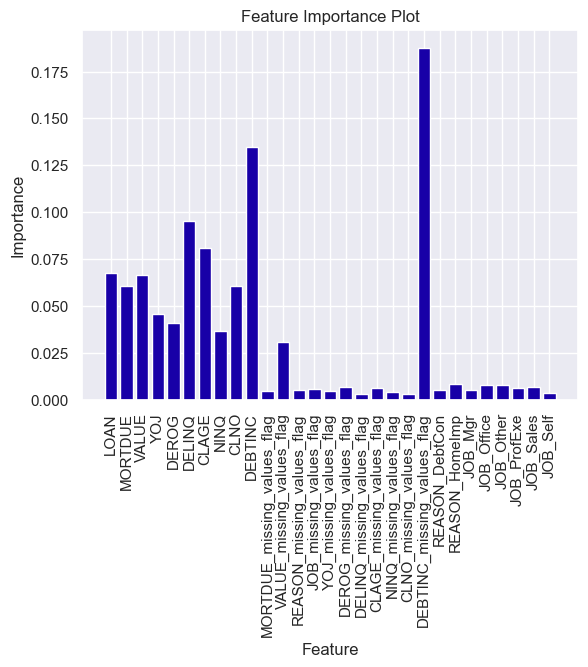

In [82]:
# Importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

# Check performace on test dataset
importance = clf_tuned.feature_importances_

plt.bar(X_train.columns, importance)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance Plot")
plt.xticks(rotation=90)
plt.show()

### **Comparing Model Performances**

In [83]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list
    a.append(test_recall) # adding test recall to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

    return a # returning the list with train and test scores

In [84]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [85]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))

    return c # returning the list with train and test scores

In [86]:
# Make the list of all the model names
models = [model, clf, clf2, rf_clf, rf_clf_weighted, clf_tuned]

# Define empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# Loop through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [87]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Weighted Random Forest', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.800755,0.800336,0.003155,0.004202,0.600000,0.500000
1,Decision Tree,1.000000,0.882550,1.000000,0.621849,1.000000,0.747475
2,Tuned Decision Tree,0.940227,0.867450,0.934805,0.701681,0.799460,0.657480
3,Random Forest,1.000000,0.915268,1.000000,0.705882,1.000000,0.844221
4,Weighted Random Forest,1.000000,0.907718,1.000000,0.668067,1.000000,0.836842
5,Tuned Random Forest,0.989723,0.909396,0.957939,0.701681,0.990217,0.818627


**Insights:**
- The train accuracy is highest for Decision Tree, Random Forest, and Weighted Random Forest, with a score of 1.0. 
    - This indicates overfitting as the train accuracy is much higher than the test accuracy, which is a measure of the model's ability to generalize to new data.

- The highest test accuracy is achieved by the Tuned Random Forest model, with a score of 0.911074.

- The recall score is higher for the Decision Tree and Random Forest models, compared to the Logistic Regression and Tuned Random Forest models. 
    - A higher recall score means the model is able to correctly identify more positive instances.

- The precision score is higher for the Random Forest and Weighted Random Forest models, compared to the Decision Tree and Tuned Decision Tree models. 
    - A higher precision score means the model has a lower false positive rate.

- The Logistic Regression model has a low recall score and precision score, which indicates a low ability to correctly identify positive instances and a high rate of false positives.

- The performance of the models has improved after tuning, as seen by the increase in the test accuracy and precision scores for the Tuned Decision Tree and Tuned Random Forest models.

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

#### Note: Answers to above questions 1-3 are in accompanying report titled Loan_Default_Prediction_Report